In [100]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [84]:
df = pd.read_csv("/home/jovyan/linear_reg/data/cleaned_admission_data.csv") 

In [62]:
df.head()

,Admit,Deposit,Enroll,F,Ethnicity,Region Description,Age,ACT Category Description,College,Major,Convert_GPA_Fix,FIN_AID_INTEREST
0,False,False,False,F,White,Chicago Central,62.0,Unknown,Liberal Arts & Social Sciences,UGRD Undeclared TBD,NaN,Y
1,False,False,False,F,Multiracial,Chicago Far South,23.0,Unknown,Commerce,Business Administration,NaN,N
2,False,False,False,F,Hispanic,Chicago North,25.0,16-19,Commerce,Management,NaN,N
3,False,False,False,F,White,Out of State,19.0,Unknown,Commerce,Business Administration,4.1,N
4,False,True,False,F,Hispanic,Suburban West,23.0,20-23,Science and Health,Psychology,NaN,Y


In [45]:
df.Deposit.unique()

array([False, True], dtype=object)

In [63]:
df.Ethnicity.unique()

array(['White', 'Multiracial', 'Hispanic', 'Asian/Pacific Islander',
       'Black', 'Not Applicable', 'International',
       'American Indian/Alaskan Native', 'Native Hawaiian/Oth Pac Island'], dtype=object)

In [21]:
df.Age.unique()

array([ 62.,  23.,  25.,  19.,  22.,  42.,  18.,  20.,  nan,  17.,  24.,
        16.,  21.,  27.,   1.,  33.,  49.,  14.,  30.,  28.,  26.,  29.,
        31.,  48.])

In [22]:
df.ACT Category Description.unique()

SyntaxError: invalid syntax (<ipython-input-22-cbd5e29d3790>, line 1)

In [23]:
df.Convert_GPA_Fix.unique()

array([   nan,  4.1  ,  2.538, ...,  1.911,  1.556,  1.66 ])

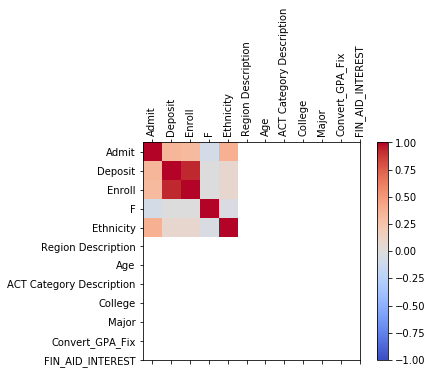

In [24]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18197 entries, 0 to 18196
Data columns (total 12 columns):
Admit                       18197 non-null bool
Deposit                     18197 non-null bool
Enroll                      18197 non-null bool
F                           18197 non-null object
Ethnicity                   18197 non-null object
Region Description          18197 non-null object
Age                         18191 non-null float64
ACT Category Description    18197 non-null object
College                     18092 non-null object
Major                       18099 non-null object
Convert_GPA_Fix             16023 non-null float64
FIN_AID_INTEREST            18098 non-null object
dtypes: bool(3), float64(2), object(7)
memory usage: 1.3+ MB


In [29]:
df.corr(method='spearman')

,Admit,Deposit,Enroll,Age,Convert_GPA_Fix
Admit,1.000000,0.339145,0.318503,-0.054758,0.392140
Deposit,0.339145,1.000000,0.932718,0.004276,0.078477
Enroll,0.318503,0.932718,1.000000,0.003264,0.081825
Age,-0.054758,0.004276,0.003264,1.000000,-0.037479
Convert_GPA_Fix,0.392140,0.078477,0.081825,-0.037479,1.000000


In [41]:
df['Enroll'].value_counts()

Series([], Name: Enroll, dtype: int64)

In [42]:
df.head()

,Admit,Deposit,Enroll,F,Ethnicity,Region Description,Age,ACT Category Description,College,Major,Convert_GPA_Fix,FIN_AID_INTEREST
0,False,False,NaN,F,White,Chicago Central,62.0,Unknown,Liberal Arts & Social Sciences,UGRD Undeclared TBD,NaN,Y
1,False,False,NaN,F,Multiracial,Chicago Far South,23.0,Unknown,Commerce,Business Administration,NaN,N
2,False,False,NaN,F,Hispanic,Chicago North,25.0,16-19,Commerce,Management,NaN,N
3,False,False,NaN,F,White,Out of State,19.0,Unknown,Commerce,Business Administration,4.1,N
4,False,True,NaN,F,Hispanic,Suburban West,23.0,20-23,Science and Health,Psychology,NaN,Y


In [38]:
df = df.applymap(lambda df['Enroll']: 1 if df['Enroll'] == True  )


SyntaxError: invalid syntax (<ipython-input-38-843fab6a1f09>, line 1)

In [33]:
df.head()

,Admit,Deposit,Enroll,F,Ethnicity,Region Description,Age,ACT Category Description,College,Major,Convert_GPA_Fix,FIN_AID_INTEREST
0,False,False,False,F,White,Chicago Central,62.0,Unknown,Liberal Arts & Social Sciences,UGRD Undeclared TBD,NaN,Y
1,False,False,False,F,Multiracial,Chicago Far South,23.0,Unknown,Commerce,Business Administration,NaN,N
2,False,False,False,F,Hispanic,Chicago North,25.0,16-19,Commerce,Management,NaN,N
3,False,False,False,F,White,Out of State,19.0,Unknown,Commerce,Business Administration,4.1,N
4,False,True,False,F,Hispanic,Suburban West,23.0,20-23,Science and Health,Psychology,NaN,Y


In [52]:
df['Enroll'] = df['Enroll'].map({'1': 'True', '0': 'False'})

In [53]:
df.head()

,Admit,Deposit,Enroll,F,Ethnicity,Region Description,Age,ACT Category Description,College,Major,Convert_GPA_Fix,FIN_AID_INTEREST
0,False,False,NaN,F,White,Chicago Central,62.0,Unknown,Liberal Arts & Social Sciences,UGRD Undeclared TBD,NaN,Y
1,False,False,NaN,F,Multiracial,Chicago Far South,23.0,Unknown,Commerce,Business Administration,NaN,N
2,False,False,NaN,F,Hispanic,Chicago North,25.0,16-19,Commerce,Management,NaN,N
3,False,False,NaN,F,White,Out of State,19.0,Unknown,Commerce,Business Administration,4.1,N
4,False,True,NaN,F,Hispanic,Suburban West,23.0,20-23,Science and Health,Psychology,NaN,Y


In [60]:
pd.Series(map(lambda x: dict(True=1, False=0)[x],df.Enroll.values.tolist()), df.index)


SyntaxError: keyword can't be an expression (<ipython-input-60-2c9c50dd1928>, line 1)

In [64]:
print(df.isnull().sum())

Admit                          0
Deposit                        0
Enroll                         0
F                              0
Ethnicity                      0
Region Description             0
Age                            6
ACT Category Description       0
College                      105
Major                         98
Convert_GPA_Fix             2174
FIN_AID_INTEREST              99
dtype: int64


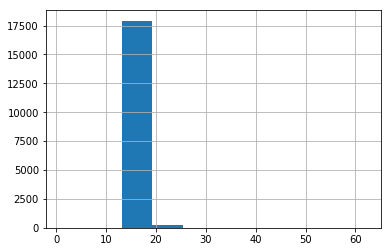

In [70]:
df['Age'].hist(bins=10)

ValueError: max must be larger than min in range parameter.

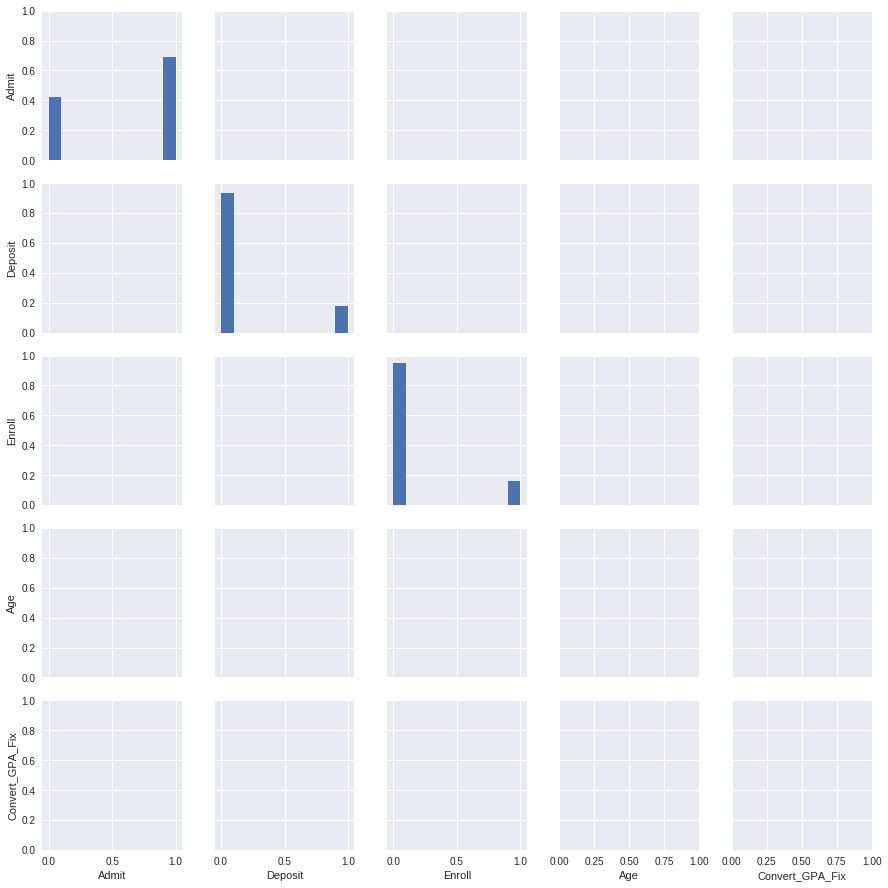

In [72]:
sns.pairplot(df)

In [76]:
df.replace(False, 0, inplace=True)

In [74]:
df.replace(True, 1, inplace=True)

In [77]:
df.head()

,Admit,Deposit,Enroll,F,Ethnicity,Region Description,Age,ACT Category Description,College,Major,Convert_GPA_Fix,FIN_AID_INTEREST
0,False,False,False,F,White,Chicago Central,62.0,Unknown,Liberal Arts & Social Sciences,UGRD Undeclared TBD,NaN,Y
1,False,False,False,F,Multiracial,Chicago Far South,23.0,Unknown,Commerce,Business Administration,NaN,N
2,False,False,False,F,Hispanic,Chicago North,25.0,16-19,Commerce,Management,NaN,N
3,False,False,False,F,White,Out of State,19.0,Unknown,Commerce,Business Administration,4.1,N
4,False,True,False,F,Hispanic,Suburban West,23.0,20-23,Science and Health,Psychology,NaN,Y


In [81]:
df['Enroll_num'] = df.Enroll.map({'False':0, 'True':1})

In [82]:
df.head()

,Admit,Deposit,Enroll,F,Ethnicity,Region Description,Age,ACT Category Description,College,Major,Convert_GPA_Fix,FIN_AID_INTEREST,Enroll_num
0,False,False,False,F,White,Chicago Central,62.0,Unknown,Liberal Arts & Social Sciences,UGRD Undeclared TBD,NaN,Y,NaN
1,False,False,False,F,Multiracial,Chicago Far South,23.0,Unknown,Commerce,Business Administration,NaN,N,NaN
2,False,False,False,F,Hispanic,Chicago North,25.0,16-19,Commerce,Management,NaN,N,NaN
3,False,False,False,F,White,Out of State,19.0,Unknown,Commerce,Business Administration,4.1,N,NaN
4,False,True,False,F,Hispanic,Suburban West,23.0,20-23,Science and Health,Psychology,NaN,Y,NaN


In [130]:
le = preprocessing.LabelEncoder()
df['Etnicity'] = le.fit_transform(df['Ethnicity'])




In [131]:
df.head()

,Admit,Deposit,Enroll,F,Ethnicity,Region Description,Age,ACT Category Description,College,Major,Convert_GPA_Fix,FIN_AID_INTEREST,enroll_int,enroll,Etnicity
0,False,False,0,F,White,Chicago Central,62.0,Unknown,Liberal Arts & Social Sciences,UGRD Undeclared TBD,NaN,Y,0,0,8
1,False,False,0,F,Multiracial,Chicago Far South,23.0,Unknown,Commerce,Business Administration,NaN,N,0,0,5
2,False,False,0,F,Hispanic,Chicago North,25.0,16-19,Commerce,Management,NaN,N,0,0,3
3,False,False,0,F,White,Out of State,19.0,Unknown,Commerce,Business Administration,4.1,N,0,0,8
4,False,True,0,F,Hispanic,Suburban West,23.0,20-23,Science and Health,Psychology,NaN,Y,0,0,3


NameError: name 'classification_model' is not defined

In [102]:
# Check for null
df.isnull().sum()

Admit                          0
Deposit                        0
Enroll                         0
F                              0
Ethnicity                      0
Region Description             0
Age                            6
ACT Category Description       0
College                      105
Major                         98
Convert_GPA_Fix             2174
FIN_AID_INTEREST              99
enroll_int                     0
enroll                         0
Etnicity                       0
dtype: int64

In [ ]:
# Bar plot fot dependent varaiable

In [123]:
X = df.iloc[:,[0,2,4,]]
y = df.iloc[:,2]
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [124]:
print (X)

       Admit  Enroll               Ethnicity
0      False       0                   White
1      False       0             Multiracial
2      False       0                Hispanic
3      False       0                   White
4      False       0                Hispanic
5      False       0  Asian/Pacific Islander
6      False       0                Hispanic
7      False       0                   White
8      False       0                   Black
9      False       0                   Black
10     False       0                Hispanic
11     False       0                Hispanic
12     False       0  Asian/Pacific Islander
13     False       0                   Black
14     False       0                   White
15     False       0                   Black
16     False       0          Not Applicable
17      True       1                   White
18      True       0           International
19      True       0                Hispanic
20     False       0                   Black
21     Fal

In [125]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_splits=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [134]:
df.Ethnicity.unique()

array(['White', 'Multiracial', 'Hispanic', 'Asian/Pacific Islander',
       'Black', 'Not Applicable', 'International',
       'American Indian/Alaskan Native', 'Native Hawaiian/Oth Pac Island'], dtype=object)

In [ ]:
le = preprocessing.LabelEncoder()
df['Etnicity'] = le.fit_transform(df['Ethnicity'])

In [ ]:
outcome_var = df['Enroll']
model= LogisticRegression()
predictor_var= df['Etnicity']
print (predictor_var)
classification_model(model,df,predictor_var,outcome_var)

In [ ]:
df.Convert_GPA_Fix.unique()